In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [18]:
#uploaded the data set
data=pd.read_csv('Telecom_customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
data.shape

(7043, 21)

In [20]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [23]:
data['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

APPLYING LABEL ENCODER FOR TOTAL CHARGES TO CONVERT SOME VALUES FROM OBJECT TO INT

In [34]:
from sklearn.preprocessing import LabelEncoder 

In [35]:
lab_enc=LabelEncoder()
df=lab_enc.fit_transform(data['TotalCharges'])
data['TotalCharges']=df

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   int32  
 4   gender_Male                            7043 non-null   uint8  
 5   Partner_Yes                            7043 non-null   uint8  
 6   Dependents_Yes                         7043 non-null   uint8  
 7   PhoneService_Yes                       7043 non-null   uint8  
 8   MultipleLines_No phone service         7043 non-null   uint8  
 9   MultipleLines_Yes                      7043 non-null   uint8  
 10  InternetService_Fiber optic            7043 non-null   uint8  
 11  Inte

In [24]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

APPLYING GET DUMMIES METHOD TO CONVERT OBJECT COLUMN TO INTEGER VALUES 

In [25]:
data=pd.get_dummies(data=data,columns=[ 'gender', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn'],drop_first=True)
data.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.5,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1


In [27]:
data=data.drop(['customerID'],axis=1)

<AxesSubplot:xlabel='tenure', ylabel='Density'>

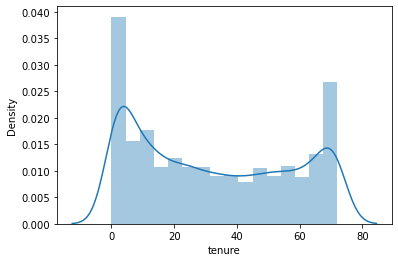

In [30]:
sns.distplot(data['tenure'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

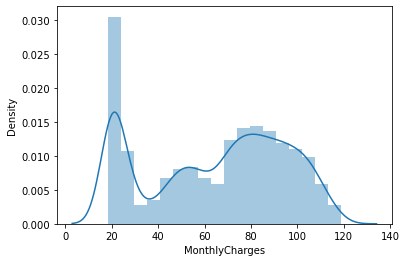

In [31]:
sns.distplot(data['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

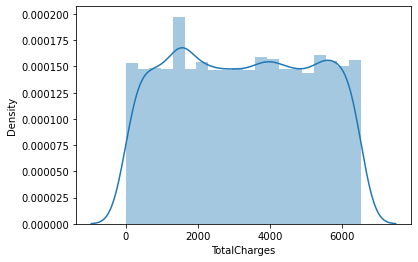

In [37]:
sns.distplot(data['TotalCharges'])

PLOTING THE COUNTPLOT FOR THE CATEGORICAL FEATURES

In [39]:
df=data.drop(columns=['tenure','TotalCharges','MonthlyCharges','Churn_Yes'])

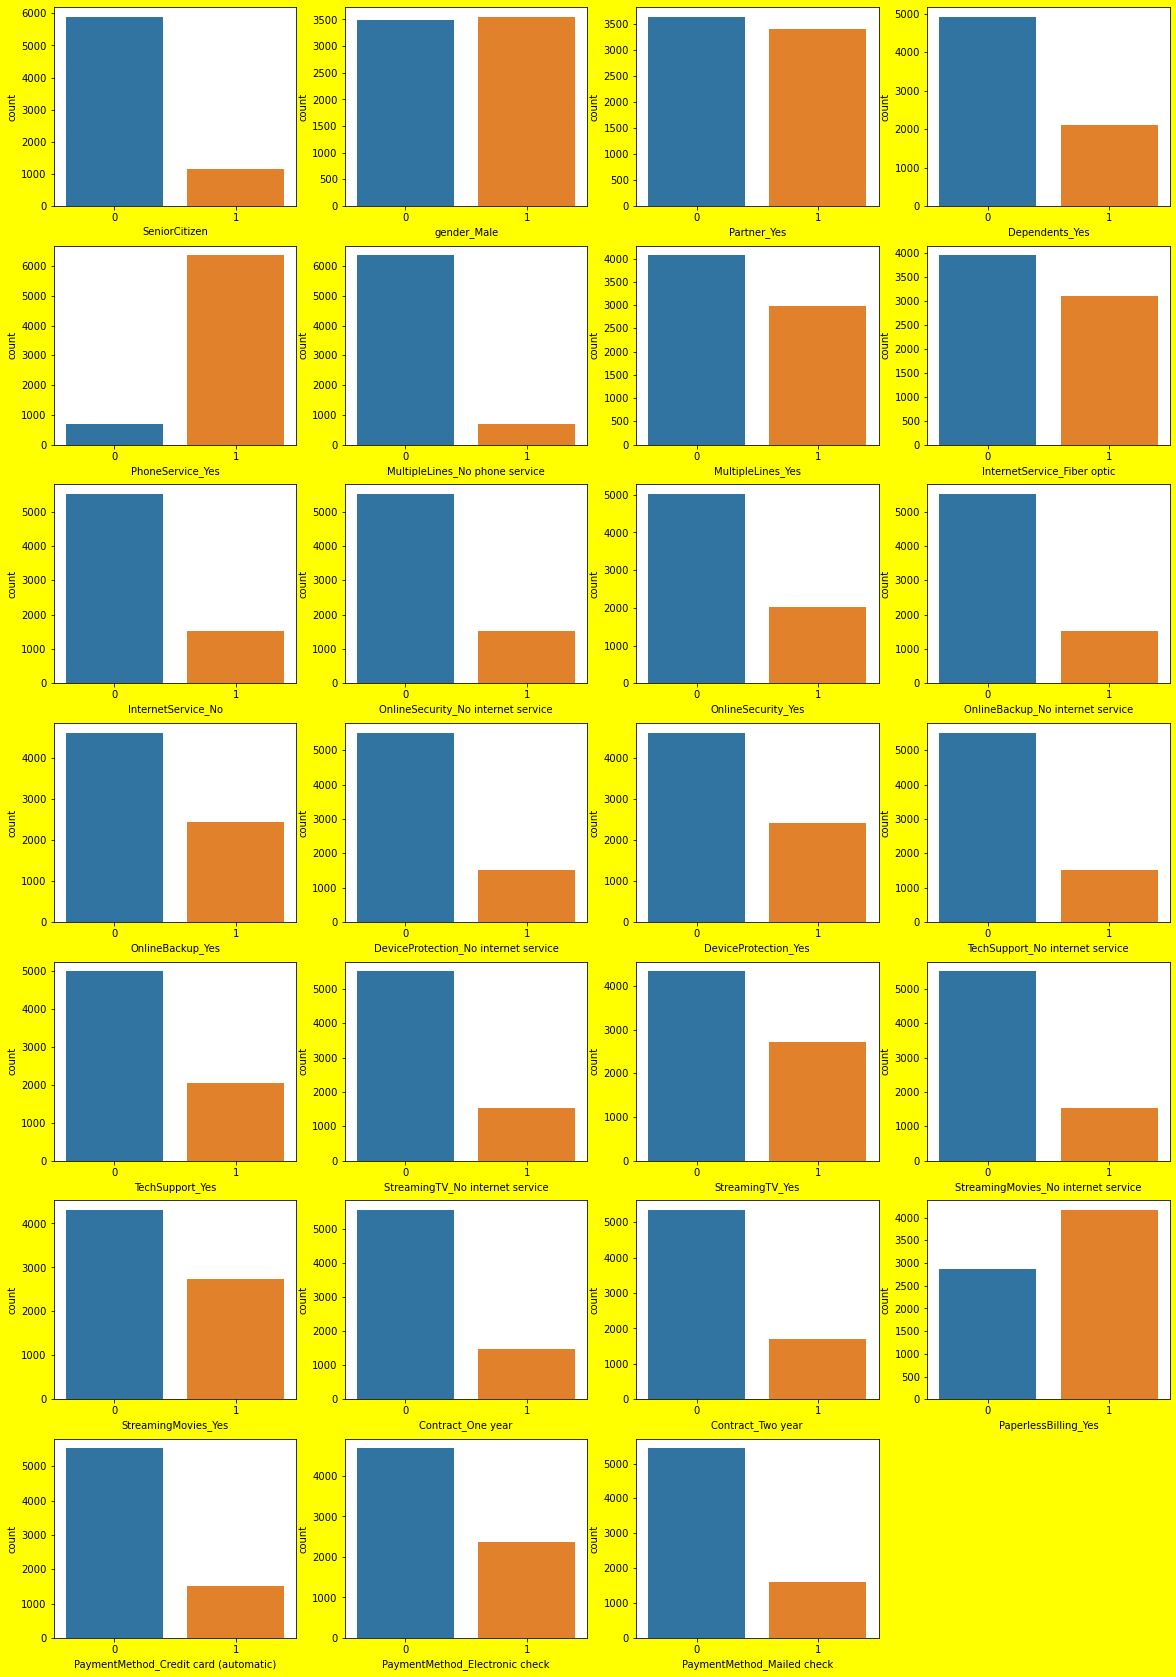

In [43]:
plt.figure(figsize=(20,30),facecolor='yellow')
plotnumber=1
for column in df:
    if plotnumber<=30:
        ax=plt.subplot(7,4,plotnumber)
        sns.countplot(df[column])
    plotnumber+=1
plt.show()

In [44]:
corr=data.corr().abs()
corr.shape
corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
SeniorCitizen,1.000000,0.016567,0.220173,0.037653,0.001874,0.016479,0.211185,0.008576,0.008576,0.142948,...,0.105378,0.182742,0.120176,0.046262,0.117000,0.156530,0.024135,0.171718,0.153477,0.150889
tenure,0.016567,1.000000,0.247900,0.158523,0.005106,0.379697,0.159712,0.008448,0.008448,0.331941,...,0.279756,0.039062,0.286111,0.202570,0.558533,0.006152,0.233006,0.208363,0.233852,0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.279875,0.014569,0.096848,0.113890,0.247398,0.247398,0.490434,...,0.629603,0.763557,0.627429,0.004904,0.074681,0.352150,0.030550,0.271625,0.377437,0.193356
TotalCharges,0.037653,0.158523,0.279875,1.000000,0.005291,0.059568,0.009572,0.083195,0.083195,0.135300,...,0.198408,0.171740,0.204614,0.041687,0.083705,0.100957,0.025894,0.041220,0.096529,0.014479
gender_Male,0.001874,0.005106,0.014569,0.005291,1.000000,0.001808,0.010517,0.006488,0.006488,0.008414,...,0.008393,0.006026,0.010487,0.008026,0.003695,0.011754,0.001215,0.000752,0.013744,0.008612
Partner_Yes,0.016479,0.379697,0.096848,0.059568,0.001808,1.000000,0.452676,0.017706,0.017706,0.142057,...,0.124666,0.000615,0.117412,0.082783,0.248091,0.014877,0.082029,0.083852,0.095125,0.150448
Dependents_Yes,0.211185,0.159712,0.113890,0.009572,0.010517,0.452676,1.000000,0.001762,0.001762,0.024526,...,0.016558,0.139812,0.039741,0.068368,0.204613,0.111377,0.060267,0.150642,0.059071,0.164221
PhoneService_Yes,0.008576,0.008448,0.247398,0.083195,0.006488,0.017706,0.001762,1.000000,1.000000,0.279690,...,0.022574,0.172209,0.032959,0.002791,0.003519,0.016505,0.007721,0.003062,0.003319,0.011942
MultipleLines_No phone service,0.008576,0.008448,0.247398,0.083195,0.006488,0.017706,0.001762,1.000000,1.000000,0.279690,...,0.022574,0.172209,0.032959,0.002791,0.003519,0.016505,0.007721,0.003062,0.003319,0.011942
MultipleLines_Yes,0.142948,0.331941,0.490434,0.135300,0.008414,0.142057,0.024526,0.279690,0.279690,1.000000,...,0.257152,0.210564,0.258751,0.003794,0.106253,0.163530,0.060048,0.083618,0.227206,0.040102


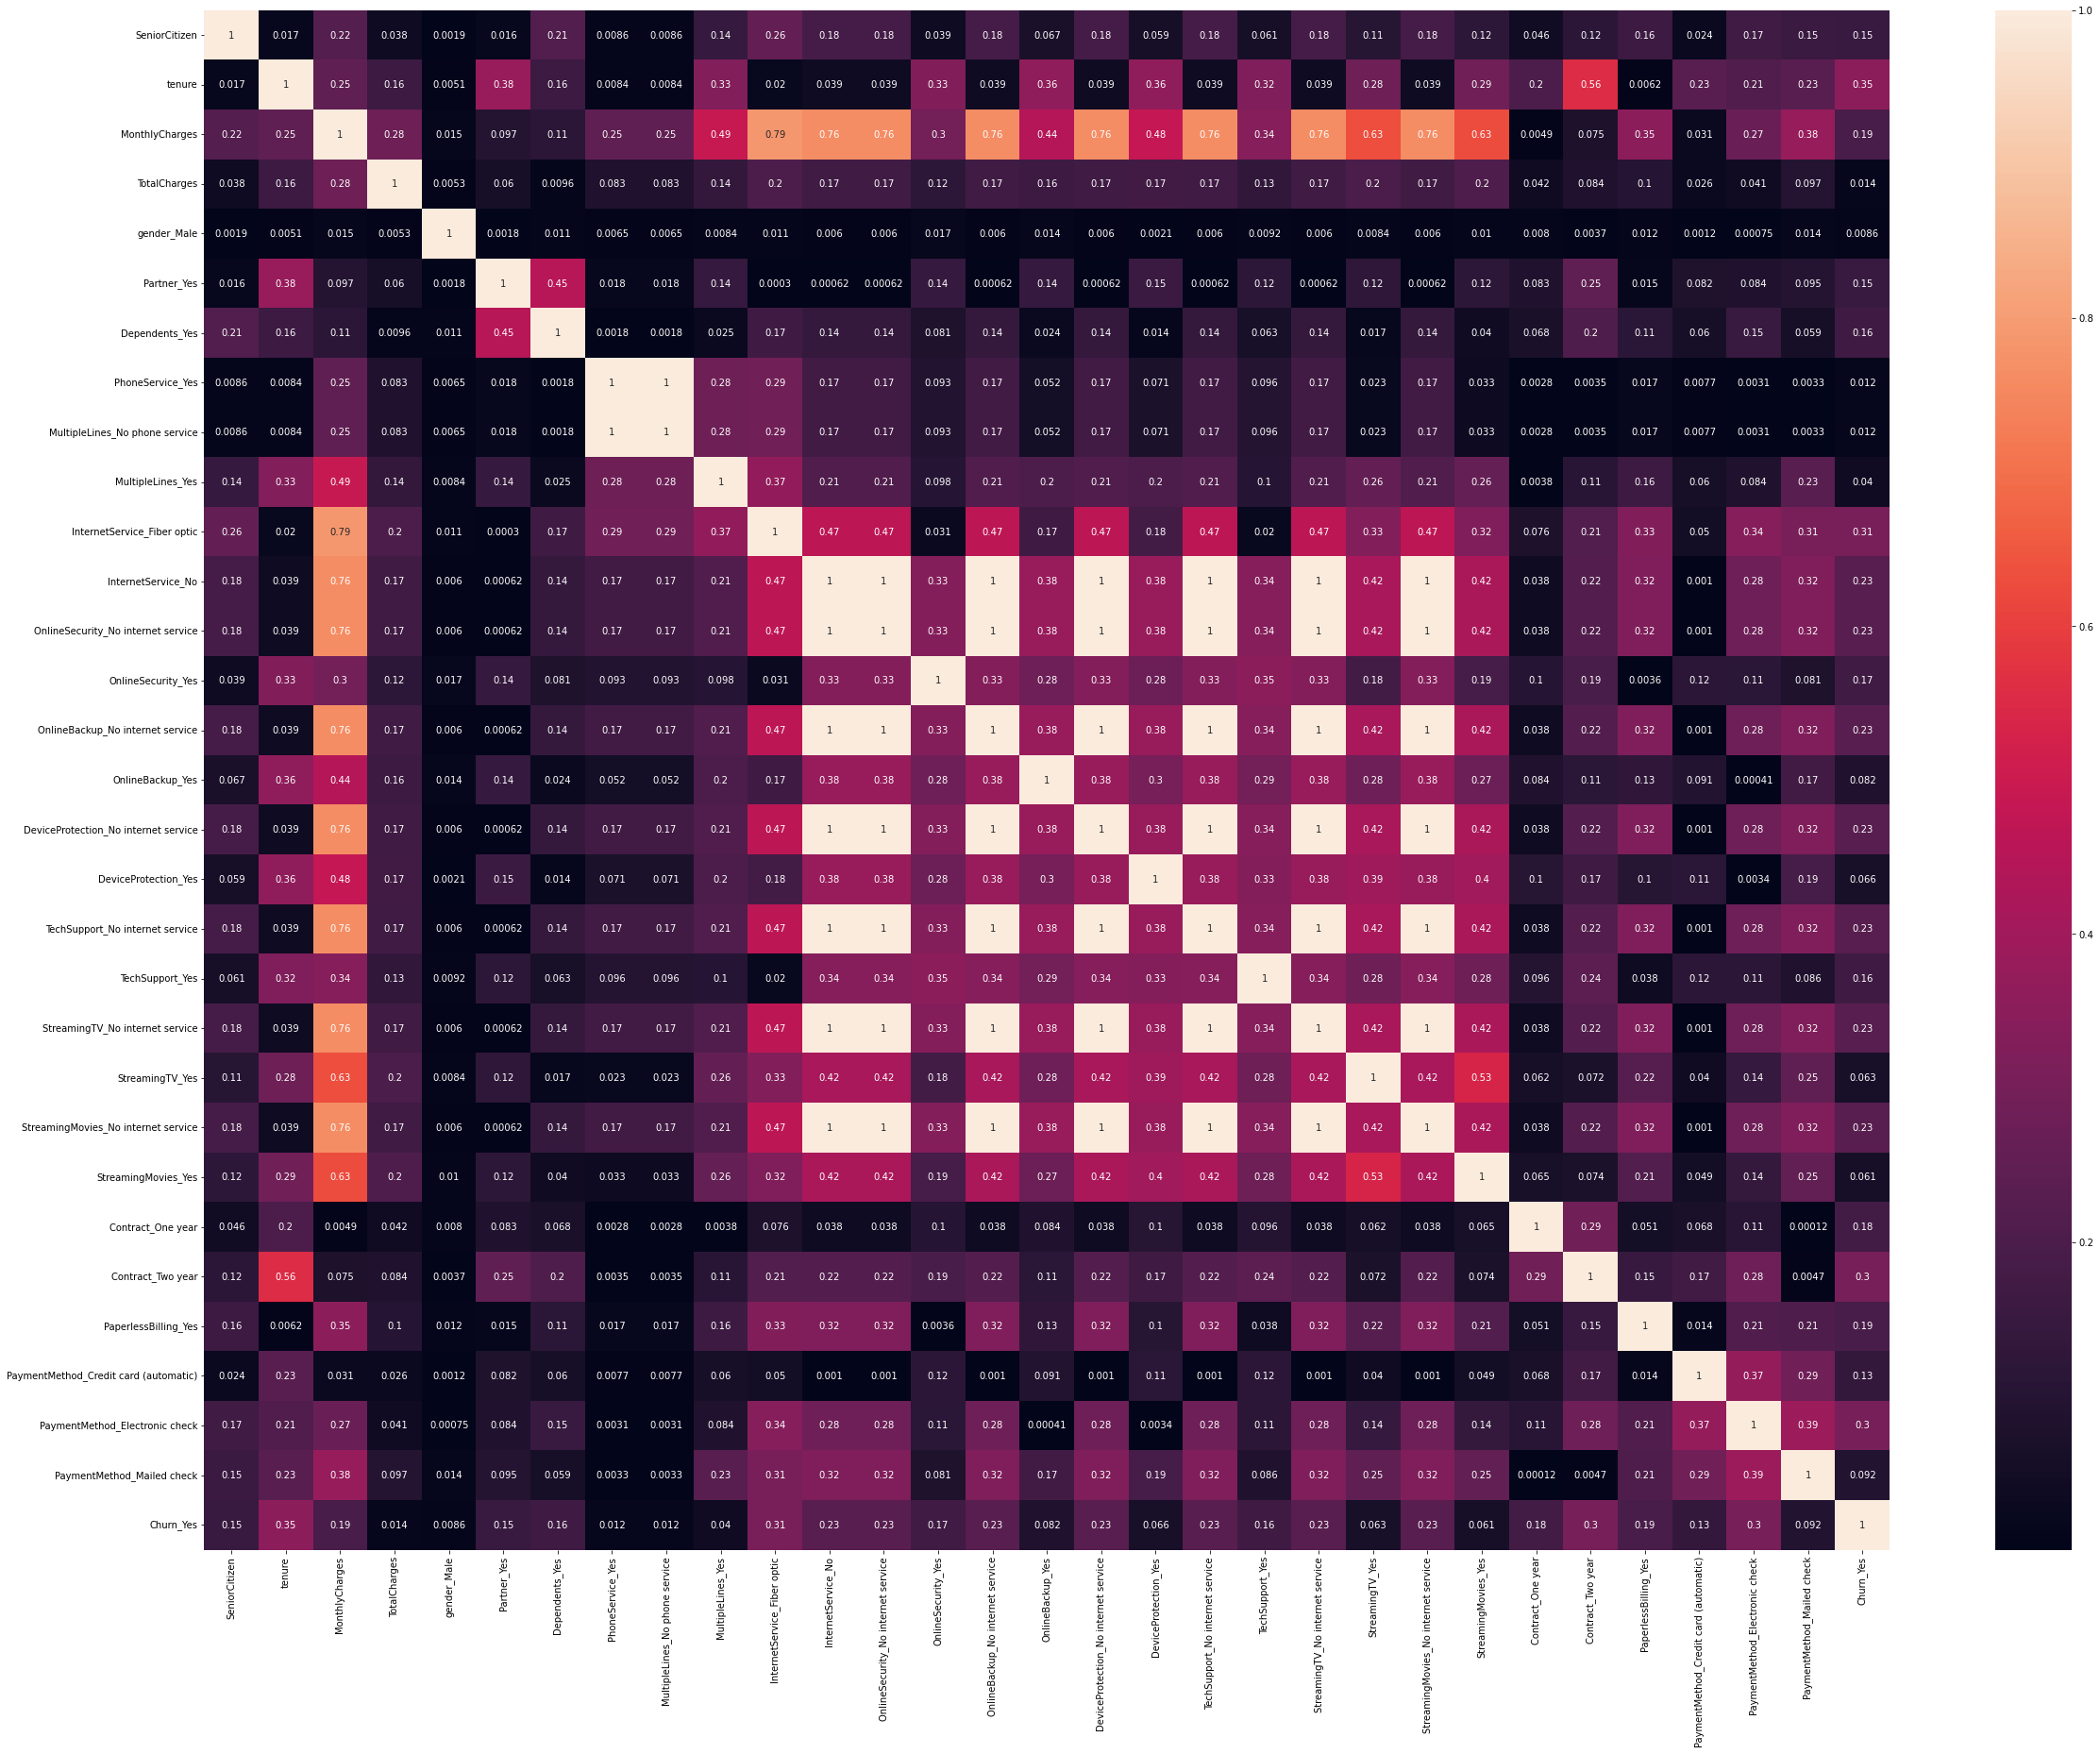

In [47]:
plt.figure(figsize=(40,30))

sns.heatmap(corr,annot=True,annot_kws={'size':10})
plt.show()

In [48]:

X=data.drop(columns=['Churn_Yes'])
y=data['Churn_Yes']

In [49]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [50]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.25,random_state=56)
y_train.head()

2500    0
2456    0
1705    0
3011    0
5444    0
Name: Churn_Yes, dtype: uint8

# LOGISTIC REGRESSION

In [53]:
log_reg=LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [54]:
y_pred=log_reg.predict(x_test)

In [55]:
y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [57]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8154457694491766

In [58]:
#confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[1182,  107],
       [ 218,  254]], dtype=int64)

In [59]:
from sklearn.metrics import classification_report

In [60]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1289
           1       0.70      0.54      0.61       472

    accuracy                           0.82      1761
   macro avg       0.77      0.73      0.74      1761
weighted avg       0.81      0.82      0.81      1761



# DECISION TREE

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [63]:
clf.score(x_train,y_train)

0.9981067777357062

In [64]:
y_pred1=clf.predict(x_test)
accuracy_score(y_test,y_pred1)

0.7336740488358887

# KNN NEIGHBORS

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn=KNeighborsClassifier()

In [67]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [68]:
y_pred2=knn.predict(x_test)
y_pred2

array([0, 0, 1, ..., 1, 0, 1], dtype=uint8)

In [69]:
cfm=confusion_matrix(y_test,y_pred2)
cfm

array([[1094,  195],
       [ 227,  245]], dtype=int64)

In [70]:
print(classification_report(y_test,y_pred2,digits=2))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1289
           1       0.56      0.52      0.54       472

    accuracy                           0.76      1761
   macro avg       0.69      0.68      0.69      1761
weighted avg       0.76      0.76      0.76      1761



# CHOOSING THE LOGISTIC REGRESSION FOR THE GIVEN PROBLEM

# cross validation score of logistic regression

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
scores = cross_val_score(log_reg, X, y, cv=10)
scores

array([0.79007092, 0.80851064, 0.80283688, 0.81392045, 0.78125   ,
       0.796875  , 0.80681818, 0.81534091, 0.79403409, 0.81107955])

In [73]:
cross_val_score(log_reg, X, y, cv=10).mean()

0.8020736621534494

# ROC AUC CURVE

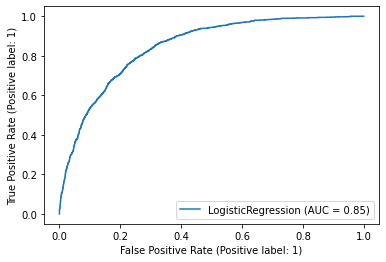

In [74]:
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(log_reg,x_train,y_train)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

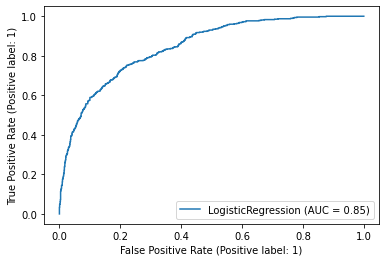

In [75]:
disp=plot_roc_curve(log_reg,x_test,y_test)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

# SAVING THE MODEL

In [76]:
import pickle

In [77]:
filename='telecom_customer_churn'
pickle.dump(clf,open(filename,'wb'))
loaded_model=pickle.load(open(filename,'rb'))